In [1]:
#importing the necessary libraries
from warnings import filterwarnings
filterwarnings('ignore')

import os
os.chdir('D:/py/')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
# TSA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [2]:
#reading the dataset and storing it as a dataframe
df1 = pd.read_csv('Unemployment in India.csv')
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
#displaying the dataframe
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
#displaying the shape
df.shape

(267, 9)

In [6]:
df1.shape

(768, 7)

In [7]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
#checking for null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
#no null values, so need to handle them

In [10]:
#changing column names
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [11]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [12]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


## Statistics

In [14]:

df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [15]:
# round the columns value 
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)


,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [16]:
#grouping by 'Region' and finding mean values
regionStats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

round(regionStats,2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [17]:
df.nunique()

States                                  27
Date                                    10
Frequency                                1
Estimated Unemployment Rate            252
Estimated Employed                     267
Estimated Labour Participation Rate    248
Region                                   5
longitude                               27
latitude                                24
dtype: int64

## EDA - Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


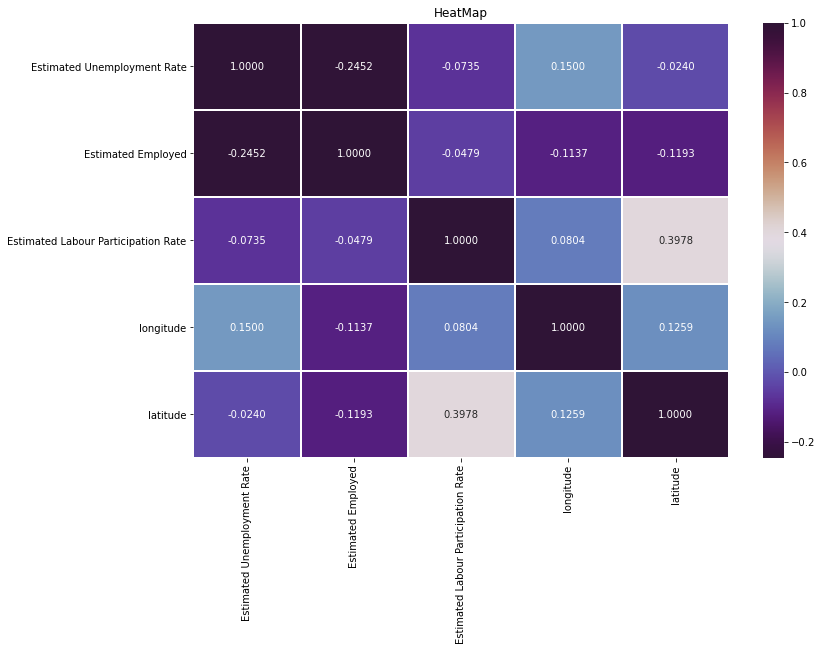

In [19]:
#plotting the figure
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap='twilight_shifted', fmt='.4f', linewidths=1)
plt.title('HeatMap')
plt.show()

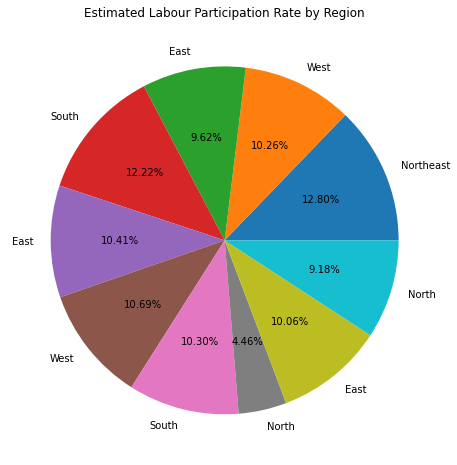

In [20]:
df_pie = df[['Region', 'Estimated Labour Participation Rate']].sample(10)

plt.figure(figsize=(12,8))
plt.pie(df_pie['Estimated Labour Participation Rate'], labels=df_pie['Region'], autopct='%.2f%%')
plt.title('Estimated Labour Participation Rate by Region')
plt.show()

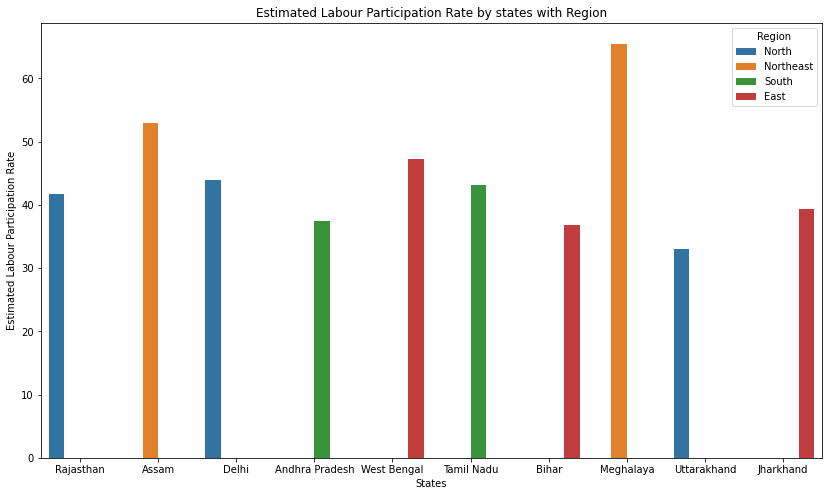

In [21]:
df_bar = df[['Region','States', 'Estimated Labour Participation Rate']].sample(10)

plt.figure(figsize=(14,8))
sns.barplot(y=df_bar['Estimated Labour Participation Rate'], x=df_bar['States'],hue=df_bar['Region'])
plt.title('Estimated Labour Participation Rate by states with Region')
plt.show()

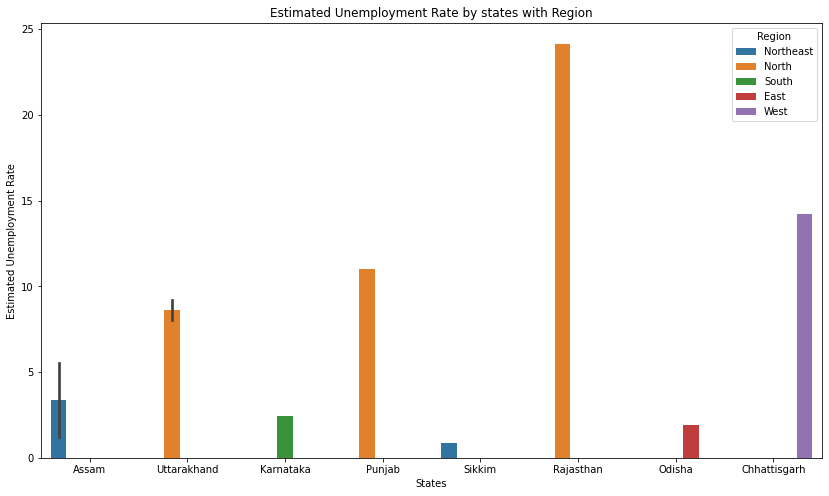

In [22]:
df_bar1 = df[['Region','States', 'Estimated Unemployment Rate']].sample(10)

plt.figure(figsize=(14,8))
sns.barplot(y=df_bar1['Estimated Unemployment Rate'], x=df_bar1['States'],hue=df_bar1['Region'])
plt.title('Estimated Unemployment Rate by states with Region')
plt.show()

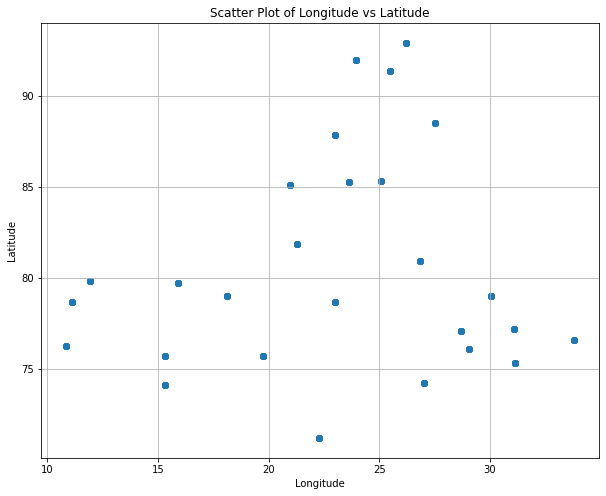

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.grid(True)
plt.show()

In [24]:
import folium

# Create a map centered around the mean of longitude and latitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add markers for each data point
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Display the map
m


In [25]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [26]:
df_em = df[['Date','States','Estimated Employed']]
df_em.head()

,Date,States,Estimated Employed
0,2020-01-31,Andhra Pradesh,16635535
1,2020-02-29,Andhra Pradesh,16545652
2,2020-03-31,Andhra Pradesh,15881197
3,2020-04-30,Andhra Pradesh,11336911
4,2020-05-31,Andhra Pradesh,12988845


In [27]:
df_em['Date'] = pd.to_datetime(df_em['Date'])
df_em.index = df_em['Date']

In [28]:
df_em.drop(['Date','States'],axis=1,inplace=True)

#Decomposition of tsa
sd=seasonal_decompose(df_em)
sd.plot()

plt.plot(sd.trend)

In [29]:
# Forecasting
model = auto_arima(df_em['Estimated Employed'], seasonal=True, suppress_warnings=True, m=6)

In [30]:
Forecast,cnf = model.predict(n_periods=12, return_conf_int=True)

C:\Users\Ankita\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
Forecast = pd.Series(Forecast)  #array to Series

In [32]:
cnf[0]

array([16668945.65063905, 45061471.55442855])

In [33]:
lower = cnf[ : , 0]
lower = pd.Series(lower)
lower.index = Forecast.index

In [34]:
upper = cnf[ : , 1]
upper = pd.Series(upper)
upper.index = Forecast.index

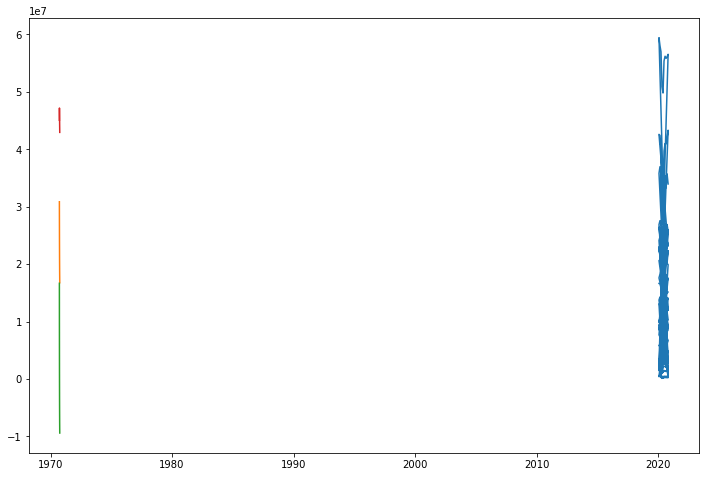

In [35]:
#plotting
plt.figure(figsize=(12,8))
plt.plot(df_em)
plt.plot(Forecast)
plt.plot(lower)
plt.plot(upper)

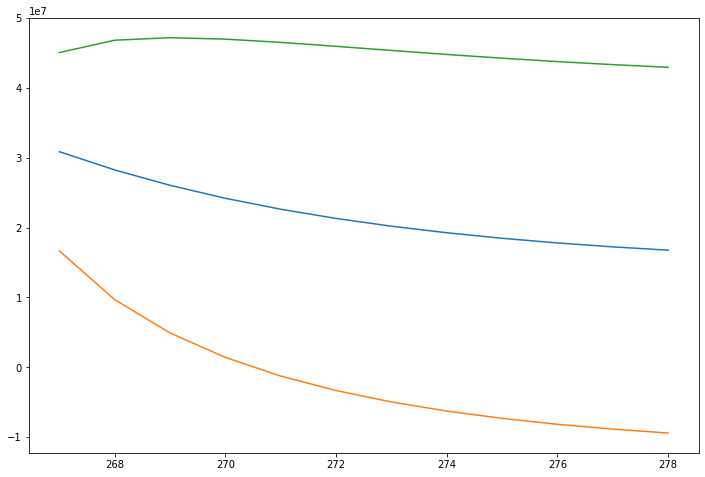

In [36]:
#plotting
plt.figure(figsize=(12,8))
plt.plot(Forecast)
plt.plot(lower)
plt.plot(upper)